In [2]:
### Analysis for consumer finance company

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read the data set we have.

In [5]:
loan_data = pd.read_csv('loan.csv')

In [6]:
# As part of initial step, understand the data set given

In [7]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
loan_data.shape

(39717, 111)

In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [10]:
## from the above data from head, looks like there are lot of NAs 
## see if there are any columns that are completely empty 

In [11]:
nan_cols = [i for i in loan_data.columns if loan_data[i].isnull().all()]
len(nan_cols)

54

In [12]:
#confirm the above data by looking at isna for each column
loan_data.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [13]:
# There are around 54 columns that are completely empty.
# We need to remove these columns
# just to be on a safer side, look at few columns randomly in the csv


In [14]:
# clean the data for safe checks like empty columns and empty rows...
def sanity_clean_data(loan_data):
    #columns with all empty values to be removed
    loan_data.dropna(axis=1, how='all', inplace=True)
    
    #columns with all same values to be removed as they dont provide any insight
    cols_nounique = [i for i in loan_data.columns if loan_data[i].nunique()==1]
    loan_data.drop(columns=cols_nounique, inplace=True, axis=1)
    
    #rows with all NAs to be removed
    loan_data.dropna(axis=0,how='all',inplace=True)
    
sanity_clean_data(loan_data)    

In [15]:
#confirm if these columns are removed.
loan_data.shape

(39717, 48)

In [16]:
# Still there are columns which have more than 90% missing data in them
# lets see what all columns have more than 90% missing data                          

In [17]:
def get_percentile_cols(percentile):
    P90 = 39717*(percentile/100)
    nan90_cols = [i for i in loan_data.columns if loan_data[i].isna().sum()>=P90]
    return nan90_cols
get_percentile_cols(90)

['mths_since_last_record', 'next_pymnt_d']

In [18]:
loan_data.shape

(39717, 48)

In [19]:
# save the filtered data into new csv so that it is easy to look at data
loan_data.to_csv('FilteredLoanData.csv', index=False)

In [20]:
#Let's see manually if any column is further redundant

In [21]:
#columns that are not necessary
# 1. url - we only have loan id changing. hence this can be ignored
# 2. desc - we cannot make any insight out of this hence drop
# 3. title- we cannot make any insight out of this hence drop
# 4. dlinq 2yrs - Derived column from mths since last delinq
# 5. It is possible for a person whose loan got ended in the past, and the one who defaulted to have last payment date in past,
# we cannot make any insights out of this, as we can't distinguish well with the following columns.
# last_pymnt_d, last_pymnt_amnt, next_pymntd
# 6. Since member id and id are both unique and distinct, we can drop one of them. Since we want to get insights about the user we can drop the loan id and keep member id
# Hence Drop

In [22]:
loan_data.shape

(39717, 48)

In [23]:
loan_data.drop(columns=['url','desc','title','delinq_2yrs','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','id'], inplace=True)

In [24]:
loan_data.shape

(39717, 40)

In [25]:
loan_data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [26]:
# we are done with investigation on important columns, now we have to perform data cleaning on rows.
loan_data.shape

(39717, 40)

In [27]:
loan_data.emp_title.fillna('',inplace=True)

# apply(lambda x: "" if np.isnan() else str(x)) 

In [28]:
loan_data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [29]:
loan_data.emp_length.isna().sum()

1075

In [30]:
# since emp_length is a categorical variable there cannot be a mean or median so we shall ignore missing values

In [31]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_title                39717 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

Now lets get into formatting the data

In [32]:
'''
Convert Objects into respective data types
term : drop months keyword
int rate: .remove percent
issue_d datetime
zipcode remove xx
earliest_cr_line datetime
revol_util remove percent
total_pymnt and totalpymnt inv avg ratio of diff
last_credit_pull_d datetime
'''

'\nConvert Objects into respective data types\nterm : drop months keyword\nint rate: .remove percent\nissue_d datetime\nzipcode remove xx\nearliest_cr_line datetime\nrevol_util remove percent\ntotal_pymnt and totalpymnt inv avg ratio of diff\nlast_credit_pull_d datetime\n'

In [33]:
# since there are only two values this is categorical data type, we can keep it as it is.
loan_data.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [34]:
# Convert int rate to numeric values
loan_data.int_rate = loan_data.int_rate.apply(lambda x: float(str(x).rstrip('%')))

In [35]:
loan_data.revol_util = loan_data.revol_util.apply(lambda x: float(str(x).rstrip('%')))

In [36]:
#Strip zipCode extras
loan_data.zip_code = loan_data.zip_code.apply(lambda x: int(str(x).rstrip('xx')))

In [37]:
(loan_data.total_pymnt - loan_data.total_pymnt_inv).describe()

count    39717.000000
mean       586.447426
std       2174.798916
min         -0.005000
25%          0.000000
50%          0.004961
75%        172.999740
max      45431.040890
dtype: float64

In [38]:
(loan_data.total_pymnt_inv/loan_data.total_pymnt).quantile(0.1)

0.9156004564668956

In [39]:
#Convert the columns to corresponding dates
loan_data.issue_d = pd.to_datetime(loan_data.issue_d,format='%b-%y')

In [40]:
#remove months from term
loan_data.term = loan_data.term.apply(lambda x: int(str(x).rstrip("months")))

In [41]:
loan_data.earliest_cr_line = pd.to_datetime(loan_data.earliest_cr_line,format='%b-%y')

In [42]:
loan_data.earliest_cr_line

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
4       1996-01-01
           ...    
39712   1990-11-01
39713   1986-12-01
39714   1998-10-01
39715   1988-11-01
39716   2003-10-01
Name: earliest_cr_line, Length: 39717, dtype: datetime64[ns]

In [43]:
loan_data[(loan_data.earliest_cr_line.isna())]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies


In [44]:
loan_data.last_credit_pull_d = pd.to_datetime(loan_data.last_credit_pull_d,format='%b-%y')

In [45]:
loan_data[(loan_data.last_credit_pull_d.isna())]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
26025,740467,5000,5000,5000.0,36,11.12,163.98,B,B3,,...,0.0,3362.960000,3362.96,2553.55,702.45,0.0,106.96,1.34,NaT,0.0
39476,186347,1000,1000,875.0,36,7.12,30.94,A,A1,,...,0.0,1110.813028,971.96,1000.00,110.81,0.0,0.00,0.00,NaT,NaN


In [46]:
# there are some NAs, lets ignore these 2 records

In [47]:
loan_data = loan_data[~(loan_data.last_credit_pull_d.isna())]

In [48]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39715 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   member_id                39715 non-null  int64         
 1   loan_amnt                39715 non-null  int64         
 2   funded_amnt              39715 non-null  int64         
 3   funded_amnt_inv          39715 non-null  float64       
 4   term                     39715 non-null  int64         
 5   int_rate                 39715 non-null  float64       
 6   installment              39715 non-null  float64       
 7   grade                    39715 non-null  object        
 8   sub_grade                39715 non-null  object        
 9   emp_title                39715 non-null  object        
 10  emp_length               38640 non-null  object        
 11  home_ownership           39715 non-null  object        
 12  annual_inc               39715 n

In [49]:
# save the filtered data into new csv so that it is easy to look at data
loan_data.to_csv('FilteredLoanData.csv', index=False)

In [50]:
'''
Let's do Analysis on data
'''

"\nLet's do Analysis on data\n"

<AxesSubplot:xlabel='annual_inc'>

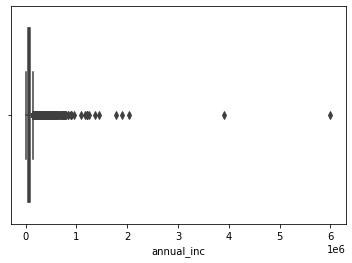

In [51]:
sns.boxplot(loan_data.annual_inc)

In [52]:

#there are a lot of outliers which needs to be treated. let us find the quantiles for this data

In [53]:
loan_data.annual_inc.quantile([0,0.01,0.05,0.25,0.50,0.75,0.90,0.95,0.99,1])

0.00       4000.00
0.01      14400.00
0.05      24000.00
0.25      40402.00
0.50      59000.00
0.75      82298.00
0.90     116000.00
0.95     142000.00
0.99     234999.44
1.00    6000000.00
Name: annual_inc, dtype: float64

In [54]:
# we can remove top 1% income as they are clearly outliers
loan_data= loan_data[loan_data.annual_inc <= loan_data.annual_inc.quantile(0.99)]

<AxesSubplot:xlabel='annual_inc'>

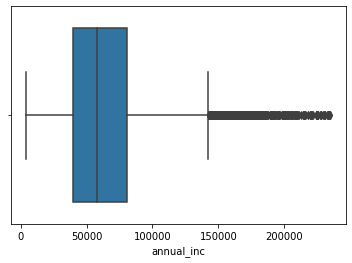

In [55]:
sns.boxplot(loan_data.annual_inc)

<AxesSubplot:xlabel='loan_amnt'>

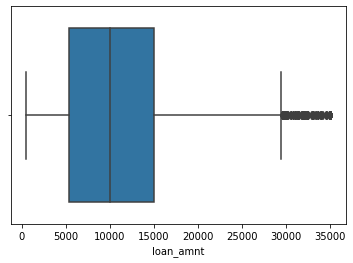

In [56]:
sns.boxplot(loan_data.loan_amnt)

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

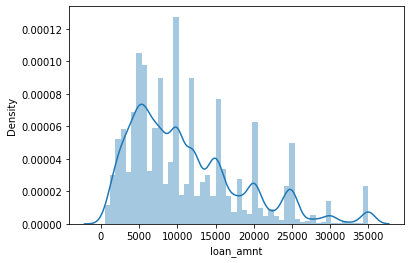

In [57]:
sns.distplot(loan_data.loan_amnt)

In [58]:
# there is a spike at all multiples of 5000s
# majority of loans taken are with amount of 10000
# and there is an increase in number of loans at 35000
# these peaks are expected as most of the people apply loans with rounded figures.

In [59]:
loan_data.term.value_counts()

36    28818
60    10499
Name: term, dtype: int64

In [60]:
#There are only 2 terms that are 36 or 60 months

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

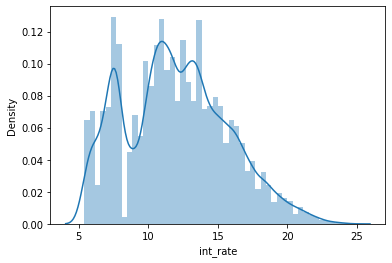

In [61]:
sns.distplot(loan_data.int_rate)

In [62]:
loan_data.int_rate.describe()

count    39317.000000
mean        12.006289
std          3.717377
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

In [63]:
# majority of loans are around 9 - 14% and there are few below 9 and above 14

In [64]:
loan_data.grade.value_counts()

B    11924
A    10017
C     8015
D     5244
E     2786
F     1025
G      306
Name: grade, dtype: int64

In [65]:
# majority of loans have grade B & A

In [66]:
loan_data.emp_length.value_counts()

10+ years    8740
< 1 year     4552
2 years      4342
3 years      4059
4 years      3410
5 years      3254
1 year       3213
6 years      2209
7 years      1759
8 years      1462
9 years      1247
Name: emp_length, dtype: int64

In [67]:
loan_data.home_ownership.value_counts()

RENT        18812
MORTGAGE    17377
OWN          3029
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [68]:
#Since there are only 3 NONE we can't make much insight of it, so let us remove it as outlier
loan_data = loan_data[loan_data.home_ownership != 'NONE']

In [69]:
# very few people have own houses in entire distribution of data
# people with own house are less likely to apply for a loan compared to rented/mortgaged houses

In [70]:
loan_data.annual_inc.describe()

count     39314.000000
mean      65520.894367
std       35214.538446
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64

In [71]:
loan_data.purpose.value_counts()

debt_consolidation    18496
credit_card            5089
other                  3955
home_improvement       2894
major_purchase         2166
small_business         1796
car                    1542
wedding                 937
medical                 686
moving                  577
vacation                381
house                   371
educational             323
renewable_energy        101
Name: purpose, dtype: int64

In [72]:
# majority of loans are taken for debt_consolidation or credit card

In [73]:
loan_data.zip_code.value_counts()

100    576
945    542
112    513
606    498
70     466
      ... 
248      1
463      1
381      1
378      1
469      1
Name: zip_code, Length: 823, dtype: int64

In [74]:
loan_data.addr_state.value_counts()

CA    7029
NY    3755
FL    2834
TX    2694
NJ    1826
PA    1508
IL    1505
VA    1395
GA    1388
MA    1320
OH    1217
MD    1036
AZ     869
WA     833
CO     782
NC     781
CT     736
MI     714
MO     681
MN     613
NV     492
SC     468
WI     459
OR     451
AL     449
LA     429
KY     324
OK     298
KS     271
UT     257
AR     245
DC     214
RI     194
NM     184
WV     177
HI     174
NH     169
DE     114
MT      85
WY      83
AK      79
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [75]:
# Majority of the loans taken are from CA  

In [76]:
loan_data.dti.describe()

count    39314.000000
mean        13.377308
std          6.662952
min          0.000000
25%          8.270000
50%         13.480000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

In [77]:
loan_data.loan_status.value_counts()

Fully Paid     32605
Charged Off     5583
Current         1126
Name: loan_status, dtype: int64

In [78]:
# since our areas of interest are "Fully paid" and "Charged off", we can remove Current loans
loan_data = loan_data[loan_data.loan_status != "Current"]
sanity_clean_data(loan_data)
loan_data.to_csv('FilteredLoanData.csv', index=False)

In [79]:
loan_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,,...,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2016-05-01,0.0
1,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,...,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-09-01,0.0
2,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,,...,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2016-05-01,0.0
3,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2016-04-01,0.0
5,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,...,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2016-01-01,0.0


In [80]:
#Segmented Univariate Analysis

In [81]:
pd.pivot_table(loan_data,index='home_ownership',values=['annual_inc','dti','loan_amnt','int_rate'] ,aggfunc=np.mean)

,annual_inc,dti,int_rate,loan_amnt
home_ownership,,,,
MORTGAGE,77695.434386,13.200222,11.641654,12347.549107
OTHER,64003.666667,11.267188,11.988021,10468.489583
OWN,55906.440387,13.247204,11.675796,10036.986766
RENT,55565.449912,13.480934,12.208562,9853.855458


In [82]:
pd.pivot_table(loan_data,index='verification_status',values=['annual_inc','dti','loan_amnt','int_rate'] ,aggfunc=np.median)

,annual_inc,dti,int_rate,loan_amnt
verification_status,,,,
Not Verified,52000.0,13.14,11.12,7500
Source Verified,55000.0,12.71,11.86,8500
Verified,69000.0,14.46,12.69,15000


In [83]:
# we see that verified individuals have more annual income and more loan amount, where as least for Not Verified

In [84]:
pd.pivot_table(loan_data,index='loan_status',values=['annual_inc','dti','loan_amnt','int_rate', 'inq_last_6mths'] ,aggfunc=np.mean)

,annual_inc,dti,inq_last_6mths,int_rate,loan_amnt
loan_status,,,,,
Charged Off,59834.399461,14.046781,1.059108,13.809108,12044.075766
Fully Paid,66258.182081,13.212200,0.836620,11.594478,10778.178960


In [85]:
#Loans having lower interest rate are more likely to be Fully Paid, rather than the ones with higher rates.

In [86]:
# we don't see any value addition doing univariate for other variables, most of them needs corelation. 
# Hence let's start bi/multi variate analysis

In [87]:
loan_data.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,zip_code,dti,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies
member_id,1.000000,0.118563,0.128603,0.239999,0.193893,0.049687,0.069062,0.030463,0.019081,0.092271,...,0.089102,0.041545,0.109450,0.203323,0.091214,0.125156,-0.058784,0.037134,-0.012241,-0.007051
loan_amnt,0.118563,1.000000,0.981803,0.937539,0.348647,0.298332,0.931726,0.415057,0.001775,0.071763,...,0.063988,0.250868,0.880478,0.845914,0.843565,0.728106,0.048250,0.144011,0.076614,-0.034003
funded_amnt,0.128603,0.981803,1.000000,0.955797,0.327027,0.302556,0.957581,0.410642,0.001564,0.071316,...,0.067819,0.245082,0.897243,0.862754,0.861687,0.736463,0.050689,0.144870,0.078538,-0.034959
funded_amnt_inv,0.239999,0.937539,0.955797,1.000000,0.346081,0.295107,0.904518,0.393054,0.001625,0.079314,...,0.072563,0.237378,0.873078,0.907846,0.836103,0.726114,0.030154,0.132723,0.064677,-0.039337
term,0.193893,0.348647,0.327027,0.346081,1.000000,0.438938,0.091338,0.073370,-0.010106,0.077316,...,0.064788,0.096076,0.306483,0.321909,0.200645,0.508103,0.013688,0.113647,0.038033,0.014212
int_rate,0.049687,0.298332,0.302556,0.295107,0.438938,1.000000,0.275110,0.066624,0.013562,0.113394,...,0.467864,-0.052296,0.287460,0.281826,0.170994,0.520198,0.095189,0.129192,0.070563,0.084361
installment,0.069062,0.931726,0.957581,0.904518,0.091338,0.275110,1.000000,0.412365,0.006314,0.061556,...,0.094423,0.223620,0.856972,0.815760,0.845481,0.641998,0.059446,0.122487,0.077056,-0.031068
annual_inc,0.030463,0.415057,0.410642,0.393054,0.073370,0.066624,0.412365,1.000000,-0.005528,-0.107843,...,0.039245,0.378935,0.395009,0.380047,0.395892,0.282767,0.014786,0.039616,0.022734,-0.017195
zip_code,0.019081,0.001775,0.001564,0.001625,-0.010106,0.013562,0.006314,-0.005528,1.000000,0.017687,...,0.037795,-0.025625,-0.005805,-0.004974,-0.006838,-0.001379,-0.012067,0.000297,0.000611,0.032106
dti,0.092271,0.071763,0.071316,0.079314,0.077316,0.113394,0.061556,-0.107843,0.017687,1.000000,...,0.280184,0.236130,0.068360,0.075004,0.045666,0.110311,-0.010798,0.026636,0.012838,0.005019


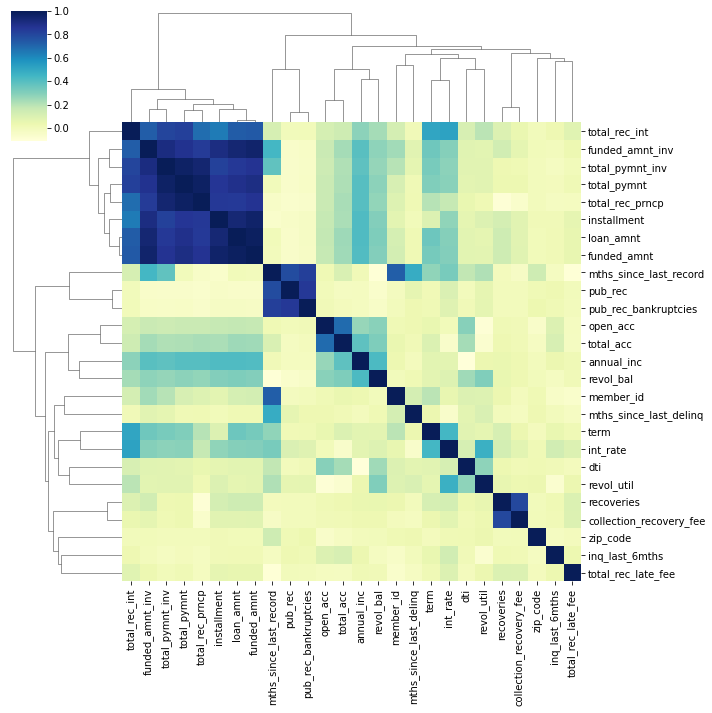

In [88]:
sns.clustermap(loan_data.corr(),cmap="YlGnBu")

In [89]:
# From the above map it is evident that the following groups are higly correlated:
# 1. [total_rec_int, funded_amnt_inv, total_pymnt_inv, installment, loan_amnt, funded_amnt, total_pymnt, total_rec_prncp]
# 2. [mths_since_last_record, pub_rec, pub_rec_bankruptcies]
# 3. [dti, open_acc, total_acc, annual_inc, revol_bal]

In [90]:
# We have three groups of numeric/continuous variables which are correlated within each group.
# And we also have few categorical variables like: [home_ownership, grade, term, emp_length, loan_status, purpose, zip_code, verification_status]

In [91]:
# see if any of the category is very evident in charge off

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

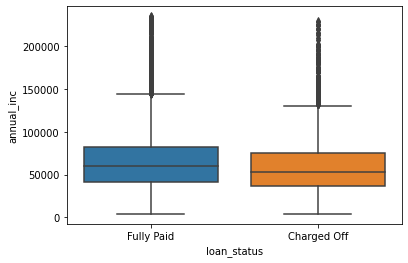

In [92]:
#loan_status vs annual_inc (should give info that if person has high income is he likely to default)
sns.boxplot(x=loan_data.loan_status,y=loan_data.annual_inc)

In [93]:
#All quartiles are slightly more for fully paid.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

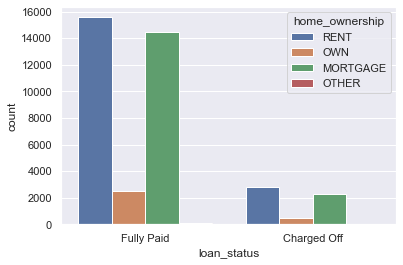

In [94]:
sns.set(style="darkgrid")
sns.countplot(x=loan_data.loan_status, hue=loan_data.home_ownership)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

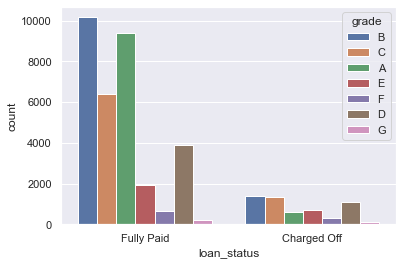

In [95]:
sns.countplot(x=loan_data.loan_status, hue=loan_data.grade)

In [96]:
#It seems that the F Subgrade category is have the lowest difference in the ratio.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

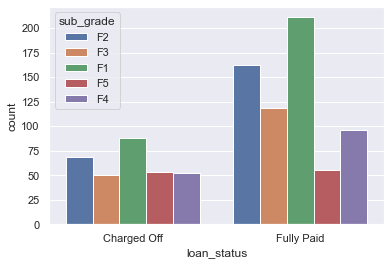

In [97]:
sns.countplot(x=loan_data[loan_data.grade=='F'].loan_status, hue=loan_data[loan_data.grade=='F'].sub_grade)

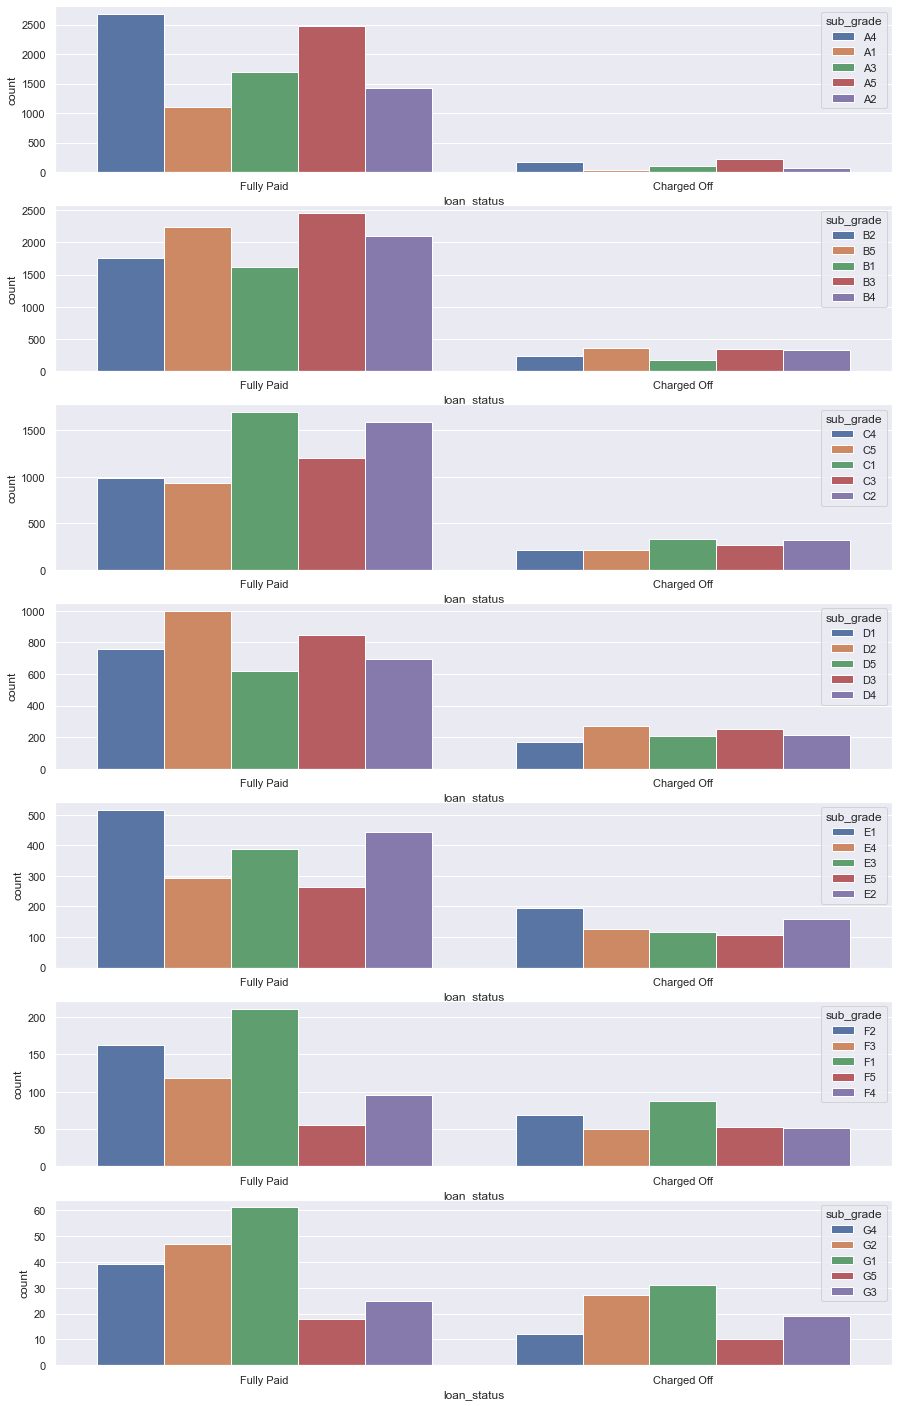

In [98]:
# As is evident from this category 
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(7, 1,figsize=(15,25))
j = 0
for i in ['A','B','C','D','E','F','G']:
    sns.countplot(x=loan_data[loan_data.grade==i].loan_status, hue=loan_data[loan_data.grade==i].sub_grade,order=['Fully Paid','Charged Off'],ax=axes[j])
    j+=1

In [99]:
#It seems from the above plot that G3 and F5 are more susceptible to be Charged Off

<AxesSubplot:xlabel='loan_status', ylabel='count'>

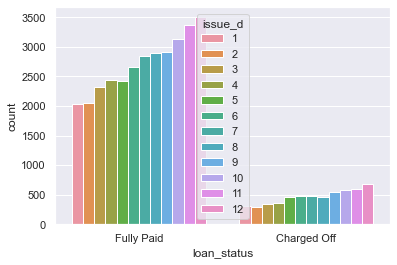

In [100]:
sns.countplot(x=loan_data.loan_status,hue=loan_data.issue_d.dt.month)

In [101]:
# There is an increasing trend in loans during the entire year but increases rapidly at end of year.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

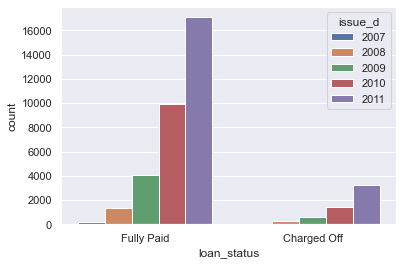

In [102]:
sns.countplot(x=loan_data.loan_status,hue=loan_data.issue_d.dt.year)

In [103]:
# There is an increasing trend in loans during the every year but increases rapidly during 2011.

In [104]:
def aggregated_analysis_for_column(column):
    aggregated_data = pd.pivot_table(loan_data,index=[column],values='member_id',columns=['loan_status'], aggfunc=lambda x:len(x))
    aggregated_data['ChargedOffRatio'] = (aggregated_data['Charged Off']*100/(aggregated_data['Charged Off'] + aggregated_data['Fully Paid']))
    aggregated_data['Count'] = aggregated_data['Charged Off'] + aggregated_data['Fully Paid']
    aggregated_data.sort_values(by='ChargedOffRatio',inplace=True,ascending=False)
    return aggregated_data.loc[:,['ChargedOffRatio','Count']]

aggregated_analysis_for_column('addr_state')

loan_status,ChargedOffRatio,Count
addr_state,,
NE,60.000000,5.0
NV,22.526316,475.0
SD,19.354839,62.0
AK,18.181818,77.0
FL,18.079302,2749.0
MO,17.142857,665.0
HI,16.867470,166.0
NM,16.759777,179.0
ID,16.666667,6.0


In [105]:
aggregated_analysis_for_column('addr_state').head(20)

loan_status,ChargedOffRatio,Count
addr_state,,
NE,60.000000,5.0
NV,22.526316,475.0
SD,19.354839,62.0
AK,18.181818,77.0
FL,18.079302,2749.0
MO,17.142857,665.0
HI,16.867470,166.0
NM,16.759777,179.0
ID,16.666667,6.0


In [106]:
# For NE state the Charged Off Ratio is too high, signifying people from that region are 60% likely to charge off

In [107]:
aggregated_analysis_for_column('addr_state').tail(20)

loan_status,ChargedOffRatio,Count
addr_state,,
OH,13.043478,1173.0
VA,12.969786,1357.0
CO,12.830688,756.0
LA,12.619048,420.0
AL,12.500000,432.0
WV,12.209302,172.0
MA,12.206573,1278.0
PA,12.200137,1459.0
KS,12.156863,255.0


In [108]:
# IA IN ME are highly likely to payback the debt. And DC and WY are also highly likr to payback.

In [109]:
zip_code_agg_data = aggregated_analysis_for_column('zip_code')
zip_code_agg_data[zip_code_agg_data.ChargedOffRatio.values >= 50]

loan_status,ChargedOffRatio,Count
zip_code,,
746,71.428571,7.0
561,71.428571,7.0
685,66.666667,3.0
798,50.000000,2.0
496,50.000000,6.0
673,50.000000,2.0
416,50.000000,4.0
413,50.000000,2.0
607,50.000000,14.0


In [110]:
# Keeping 50% as Charge Off ration Threshold, The above pincodes are highly like to Charge Off.

In [111]:
zip_code_agg_data = aggregated_analysis_for_column('zip_code')
zip_code_agg_data[zip_code_agg_data.ChargedOffRatio.values <= 10].index

Int64Index([783, 355, 949, 716, 362, 116, 652, 636, 437,  34,
            ...
            170, 435, 721, 160, 947, 448, 944, 356, 297,  69],
           dtype='int64', name='zip_code', length=138)

In [112]:
# Keeping 10% as Charge Off ration Threshold, The above pincodes are highly like to Payy off the debt.

In [113]:
verification_status_agg_data = aggregated_analysis_for_column('verification_status')

In [114]:
#Charge off ratio is high for verified which is not expected. This shows a reverse.

<AxesSubplot:xlabel='verification_status'>

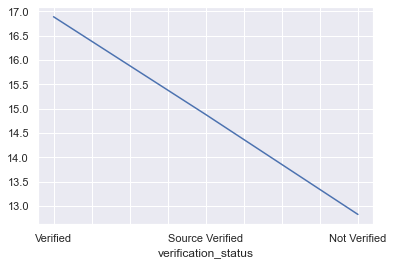

In [115]:
verification_status_agg_data.ChargedOffRatio.plot.line()

In [116]:
purpose_agg_data = aggregated_analysis_for_column('purpose')

In [117]:
purpose_agg_data.head()

loan_status,ChargedOffRatio,Count
purpose,,
small_business,27.351916,1722
renewable_energy,19.000000,100
educational,17.027864,323
other,16.427266,3829
house,16.246499,357


In [118]:
# People applying for small business are highly likely to charge off. Compared to other purposes.

<AxesSubplot:xlabel='purpose'>

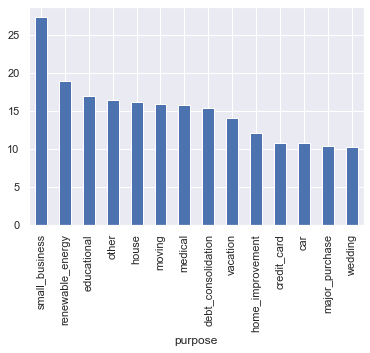

In [119]:
purpose_agg_data.ChargedOffRatio.plot.bar()

In [120]:
home_ownership = aggregated_analysis_for_column('home_ownership')

In [121]:
home_ownership.head()

loan_status,ChargedOffRatio,Count
home_ownership,,
OTHER,18.750000,96
RENT,15.345727,18396
OWN,14.930438,2947
MORTGAGE,13.744104,16749


In [122]:
# Other Category of home ownership is highly likely to charge off

In [123]:
emp_length = aggregated_analysis_for_column('emp_length')

In [124]:
emp_length

loan_status,ChargedOffRatio,Count
emp_length,,
10+ years,15.752933,8354
7 years,15.439010,1697
1 year,14.472010,3144
5 years,14.371447,3166
8 years,14.305849,1419
< 1 year,14.186774,4476
6 years,14.179451,2151
3 years,13.854664,3977
4 years,13.751508,3316


In [125]:
# There is not much affect of employment length on this.

In [126]:
emp_title = aggregated_analysis_for_column('emp_title')

In [127]:
emp_title

loan_status,ChargedOffRatio,Count
emp_title,,
National Grid,75.000000,4.0
UNITED STATES POSTAL SERVICE,75.000000,4.0
Abercrombie & Fitch,75.000000,4.0
ups,71.428571,7.0
G4S Secure Solutions,66.666667,3.0
...,...,...
zashko inc.,NaN,NaN
zeno office solutions,NaN,NaN
zion lutheran school,NaN,NaN


In [128]:
loan_data.emp_title.value_counts()

                                        2341
US Army                                  131
Bank of America                          107
IBM                                       62
AT&T                                      57
                                        ... 
westin                                     1
New Mexico Department of Corrections       1
Sapa                                       1
state of wyoming                           1
Evergreen Center                           1
Name: emp_title, Length: 27795, dtype: int64

In [129]:
term_agg_data = aggregated_analysis_for_column('term')
term_agg_data

loan_status,ChargedOffRatio,Count
term,,
60,25.424090,9373
36,11.105327,28815


In [130]:
# Seems like loans with longer tenure tend to be charged off more than loans with shorter tenure.

In [131]:
# Continuous variable vs Target variable.

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

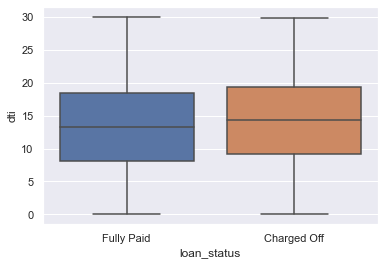

In [132]:
sns.boxplot(x=loan_data.loan_status,y=loan_data.dti)

In [133]:
# dti is very slightly high for Charged off for all quartiles, but the difference is not evident.

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

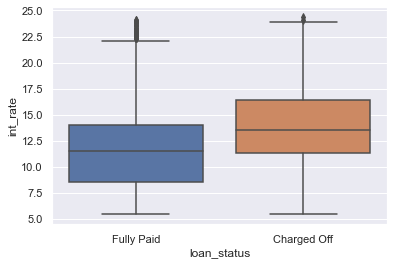

In [134]:
sns.boxplot(x=loan_data.loan_status,y=loan_data.int_rate)

In [135]:
# Interest rate is comparibly high for Charged of cases, the median for Charged off is almost above the 75% for Fully Paid.

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

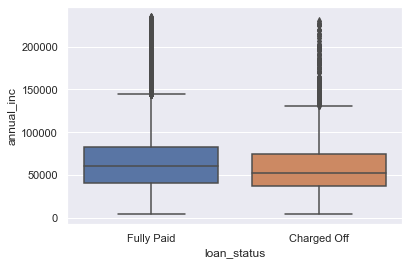

In [136]:
sns.boxplot(x=loan_data.loan_status,y=loan_data.annual_inc)

In [137]:
# People who fully pay the loan have slightly higher income than people who don't

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

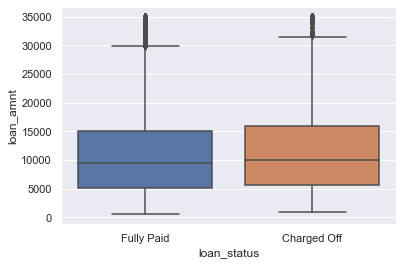

In [138]:
sns.boxplot(x=loan_data.loan_status,y=loan_data.loan_amnt)

In [139]:
#Poeple with more loan amount are very slightly more likely to be charged off.

<AxesSubplot:xlabel='loan_status', ylabel='inq_last_6mths'>

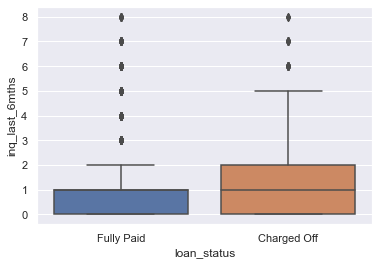

In [140]:
sns.boxplot(x=loan_data.loan_status,y=loan_data.inq_last_6mths)

In [141]:
# It looks like chargedOff people made more inquiries in the last 6 months

<AxesSubplot:xlabel='loan_status', ylabel='mths_since_last_delinq'>

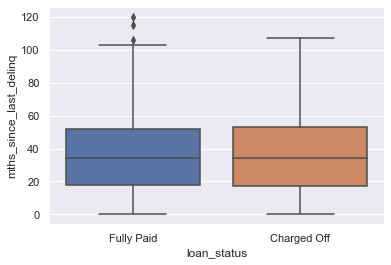

In [142]:
sns.boxplot(x=loan_data.loan_status,y=loan_data.mths_since_last_delinq)

In [143]:
#no much difference in this

<AxesSubplot:xlabel='loan_status', ylabel='mths_since_last_record'>

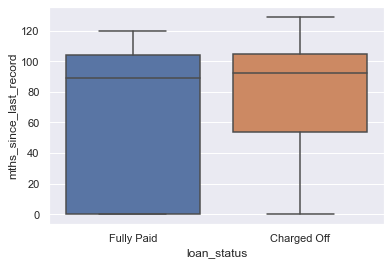

In [144]:
sns.boxplot(x=loan_data.loan_status,y=loan_data.mths_since_last_record)

<AxesSubplot:xlabel='loan_status', ylabel='open_acc'>

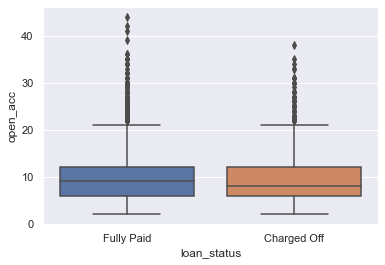

In [145]:
sns.boxplot(x=loan_data.loan_status,y=loan_data.open_acc)

<AxesSubplot:xlabel='loan_status', ylabel='revol_util'>

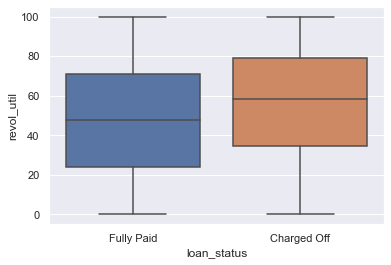

In [146]:
sns.boxplot(x=loan_data.loan_status,y=loan_data.revol_util)

In [147]:
#revol util is little high for charged off people

<AxesSubplot:xlabel='loan_amnt', ylabel='int_rate'>

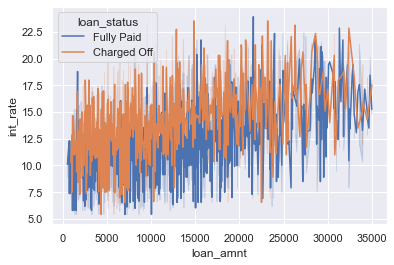

In [148]:
sns.lineplot(x=loan_data.loan_amnt,y=loan_data.int_rate,hue=loan_data.loan_status)